# LinkedIn Network Analysis
Date: 28 November 2021

In [1]:
## Installing Libraries

import numpy as np
import pandas as pd
import networkx as nx
from pyvis import network as net
import janitor

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/Users/a844133yara.com/.pyenv/versions/3.9.5/envs/python_playground/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
## Loading dataset
df = pd.read_csv('data/Connections.csv',skiprows=2)
df.info() # summary info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     397 non-null    object
 1   Last Name      397 non-null    object
 2   Email Address  7 non-null      object
 3   Company        390 non-null    object
 4   Position       390 non-null    object
 5   Connected On   400 non-null    object
dtypes: object(6)
memory usage: 18.9+ KB


At a quick glance, I have about 400 connections. 

## Data Cleaning

I will perform some cleaning, remove unnecessary attributes and remove null values from the data.

In [18]:
new_df = (
        df.clean_names() # remove spacing and capitalisation
        .drop(columns=['first_name','last_name','email_address']) # dropped first, last and email
        .dropna(subset=['company','position']) # remove null values in company and position
        .to_datetime('connected_on', format='%d %b %Y') # convert date column to datetime object
)
new_df.head()

,company,position,connected_on
0,InfoCepts,Talent Acquisition Lead,2021-11-28
1,Yara International,Associate data engineer,2021-11-27
2,Yara International,"Lead Recruiter, Digital Ag Solutions",2021-11-25
3,Yara International,Data Scientist,2021-11-25
4,Yara International,Associate Digital Information Specialist,2021-11-25


## Data Exploration

1. New connections over time
2. Top 15 companies my connections work at
3. Top 15 roles my connections work as

### New Connections over time

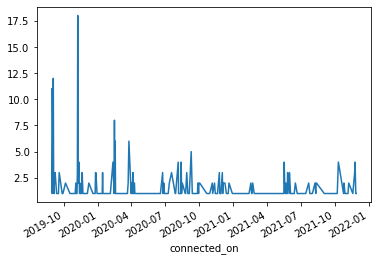

In [102]:
daily_connections = (new_df
                    .groupby(by=['connected_on']) # group by date
                    .size() # sum up new connections per day
                    .plot() # plot line chart
)

Looking at the number of new connections over time since i joined LinkedIn, bulk of my connections were created during the start - period between end 2019 and start of 2020).

### Top 15 companies my connections work at

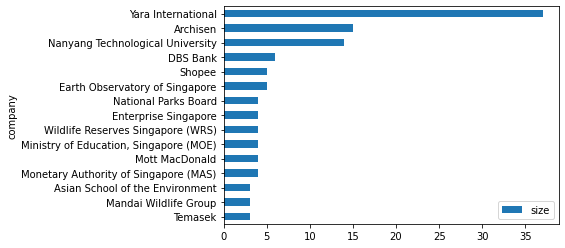

In [100]:
companies_count = (new_df
                    .groupby(by=['company']) # group by country
                    .size() # sum up count for each company
                    .to_frame('size') # convert to frame
                    .sort_values(by=['size'],ascending=False) # sort by descending order
                    .head(15) # top 15
                    .plot(kind='barh') # plot barplot
                    .invert_yaxis() # convert to horizontal plot
                    )

### Top 15 roles my connections are working in

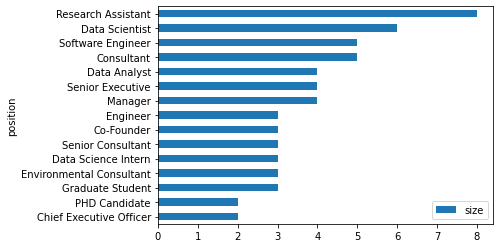

In [101]:
position_count = (new_df
                    .groupby(by=['position']) # group by country
                    .size() # sum up count for each company
                    .to_frame('size') # convert to frame
                    .sort_values(by=['size'],ascending=False) # sort by descending order
                    .head(15) # top 15
                    .plot(kind='barh') # plot barplot
                    .invert_yaxis() # convert to horizontal plot
                    )

The top 3 companies my connections are working in are from Yara, Archisen and NTU, which is expected given that I did my undergraduate degree in NTU, worked at Archisen after graduation before joining Yara International.

Most of my connections are Research Assistants, Data Scientist and Software Engineers. 

## Network Analysis